# Data visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#Importing data
data = pd.read_csv('clean.csv')
data.columns

Index(['Unnamed: 0', 'Gender', 'Age', 'Class', 'Flight Distance',
       'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

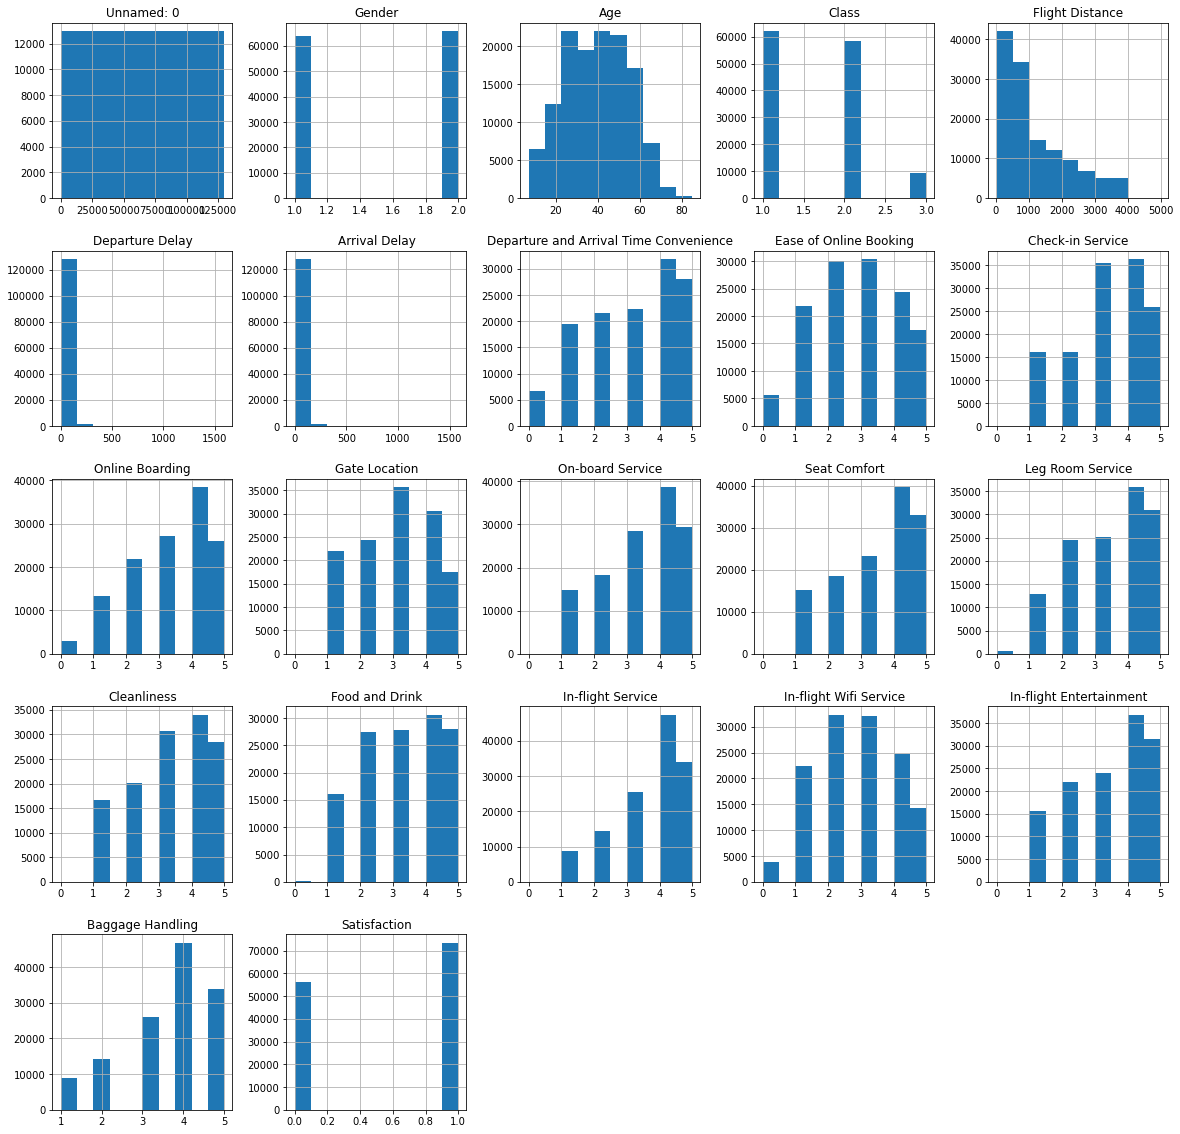

In [3]:
data.hist(figsize=(20,20))
plt.show()

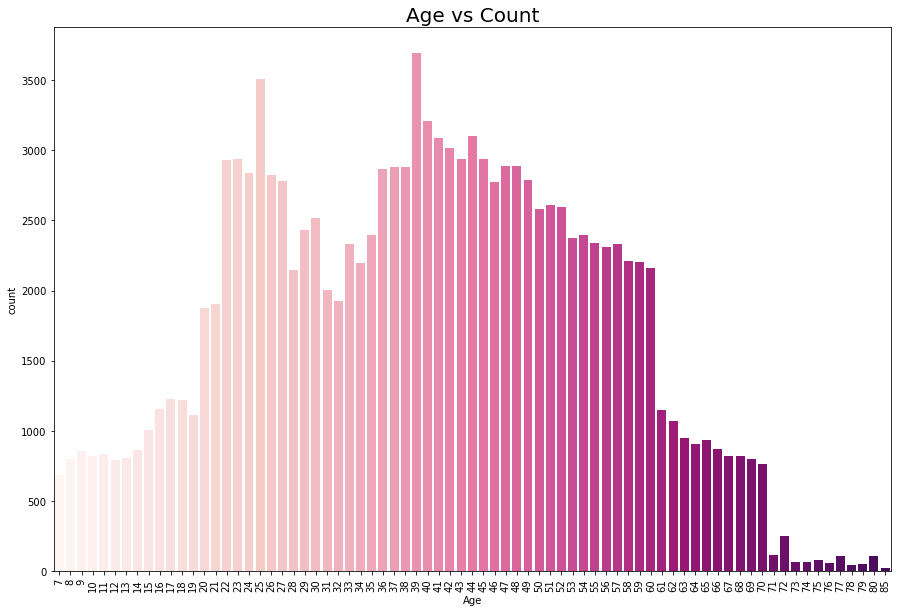

In [4]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('tableau-colorblind10')

sns.countplot(data['Age'], palette = 'RdPu')
plt.title('Age vs Count', fontweight = 30, fontsize = 20)
plt.xlabel('Age')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

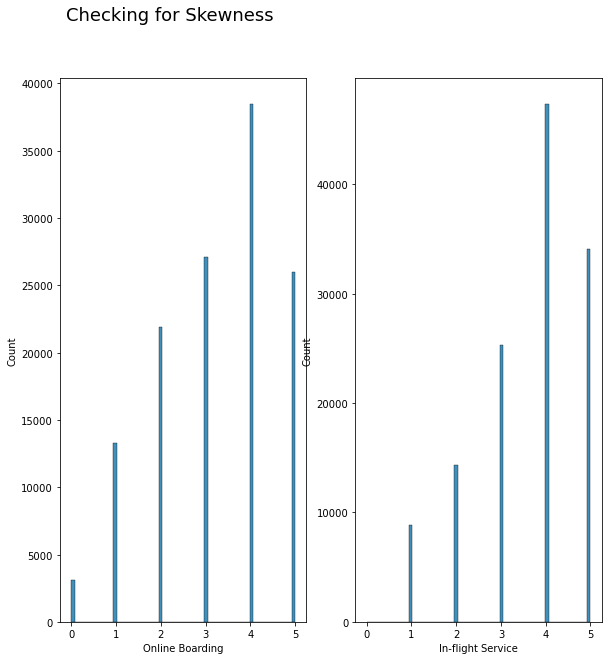

In [5]:
plt.subplot(1, 3, 2)
sns.histplot(data['Online Boarding'])

plt.subplot(1, 3, 3)
sns.histplot(data['In-flight Service'])

plt.suptitle('Checking for Skewness', fontsize = 18)
plt.show()

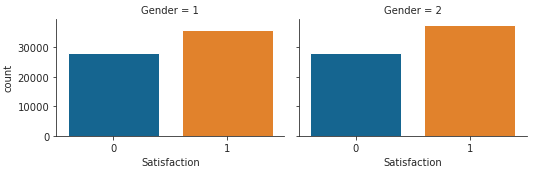

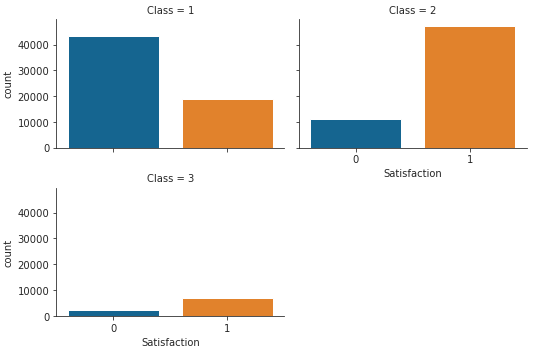

In [6]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("Satisfaction", col="Gender", col_wrap=2, data=data, kind="count", height=2.5, aspect=1.5)  
    g = sns.catplot("Satisfaction", col="Class", col_wrap=2, data=data, kind="count", height=2.5, aspect=1.5)

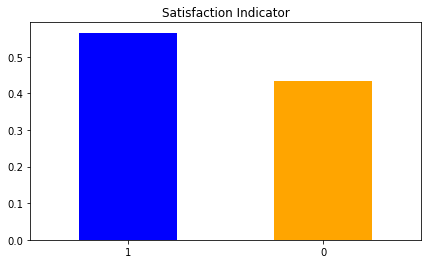

In [7]:
fig = plt.figure(figsize = (7,4))
data.Satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['blue','orange'], rot=0)
plt.title('Satisfaction Indicator')
plt.show()

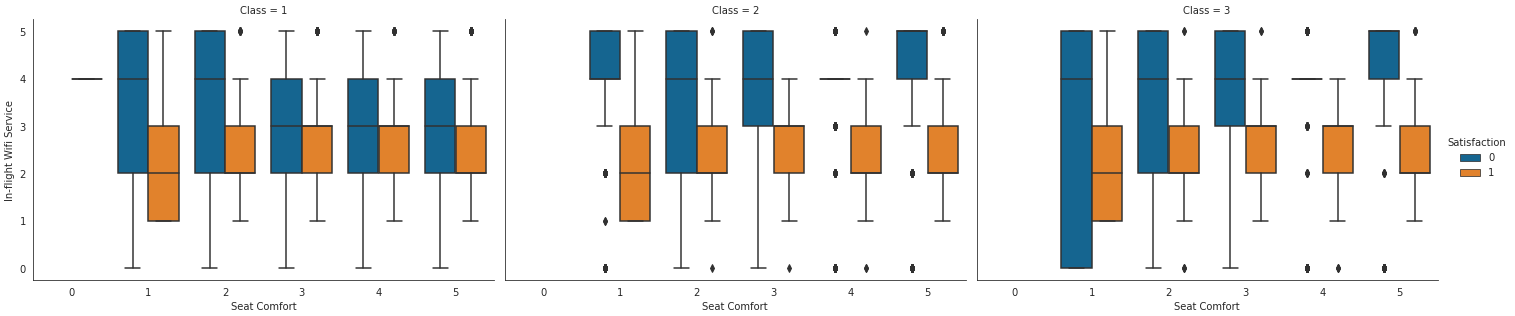

In [8]:
#passenger satisfaction with In flight wifi services
with sns.axes_style('white'):
    s = sns.catplot(x="Seat Comfort", y="In-flight Wifi Service", hue="Satisfaction", col="Class", data=data, kind="box", height=4.5, aspect=1.5)

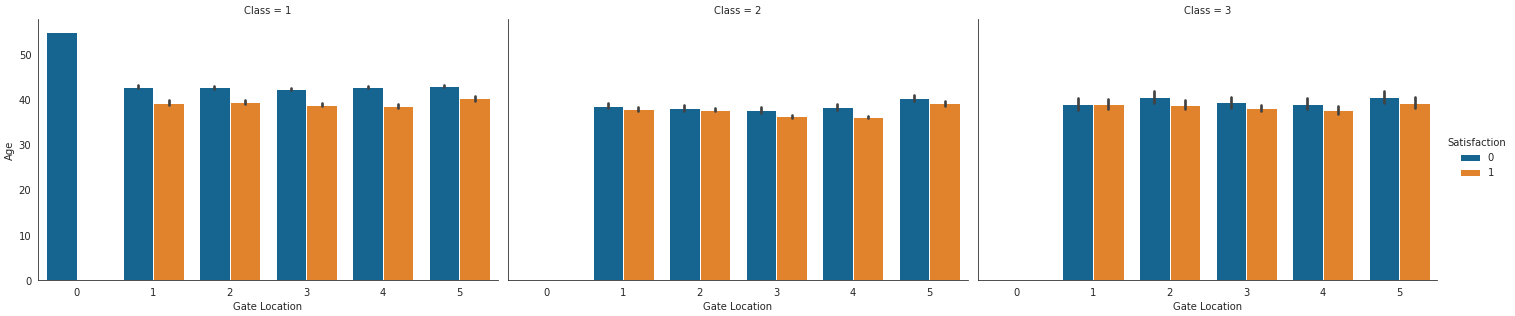

In [9]:
#Gate location satisfaction as per age
with sns.axes_style('white'):
    s = sns.catplot(x= "Gate Location", y = "Age", hue="Satisfaction", col="Class", data=data, kind="bar", height=4.5, aspect=1.5)

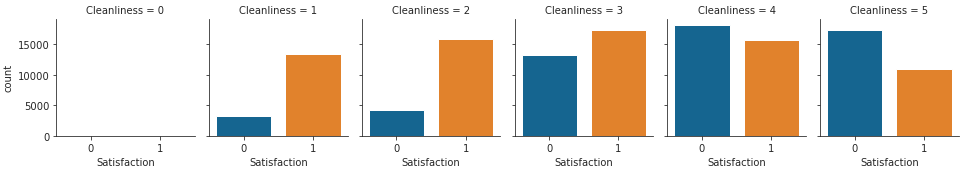

In [10]:
#passenger satisfaction with Cleaniness
with sns.axes_style(style='ticks'):
    g = sns.catplot("Satisfaction", col="Cleanliness", col_wrap=6, data=data, kind="count", height=2.5, aspect=.9)

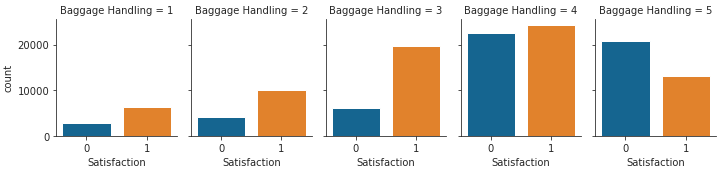

In [11]:
#passenger satisfaction with baggage handling
with sns.axes_style(style='ticks'):
    s = sns.catplot("Satisfaction", col="Baggage Handling", col_wrap=6, data=data, kind="count",height=2.5, aspect=.8)

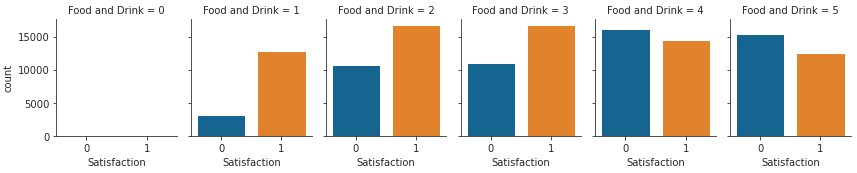

In [12]:
#passenger satisfaction with Food and Drink
with sns.axes_style(style='ticks'):
    s = sns.catplot("Satisfaction", col="Food and Drink", col_wrap=6, data=data, kind="count", height=2.5, aspect=.8)

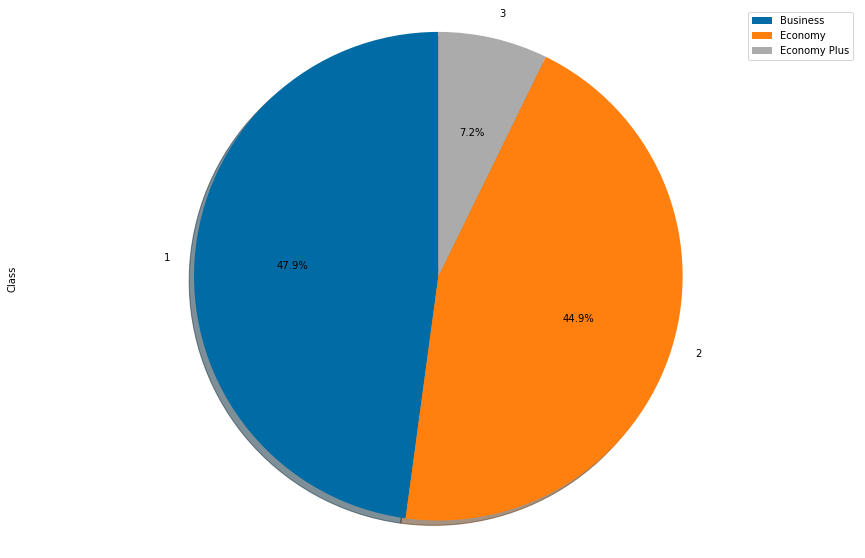

In [13]:
total = data['Class'].value_counts()
total.plot.pie(shadow=True,startangle=90,autopct='%1.1f%%')
labels = ['Business','Economy', 'Economy Plus']
plt.legend(labels)
plt.axis('equal')
plt.show()

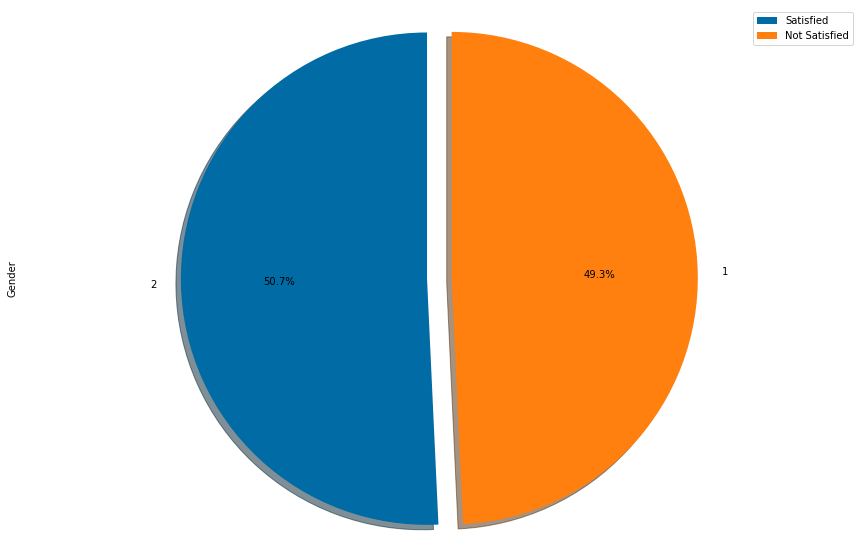

In [14]:
total = data['Gender'].value_counts()
total.plot.pie(shadow=True, explode=(0,0.1),startangle=90,autopct='%1.1f%%')
labels = ['Satisfied','Not Satisfied']
plt.legend(labels)
plt.axis('equal')
plt.show()

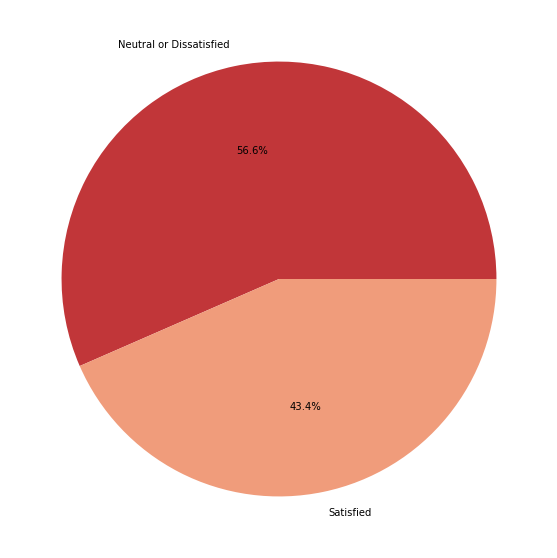

In [15]:
plt.pie(data.Satisfaction.value_counts(), 
        labels = ["Neutral or Dissatisfied", "Satisfied"], 
        colors = sns.color_palette("RdBu"), 
        autopct = '%1.1f%%')
pass

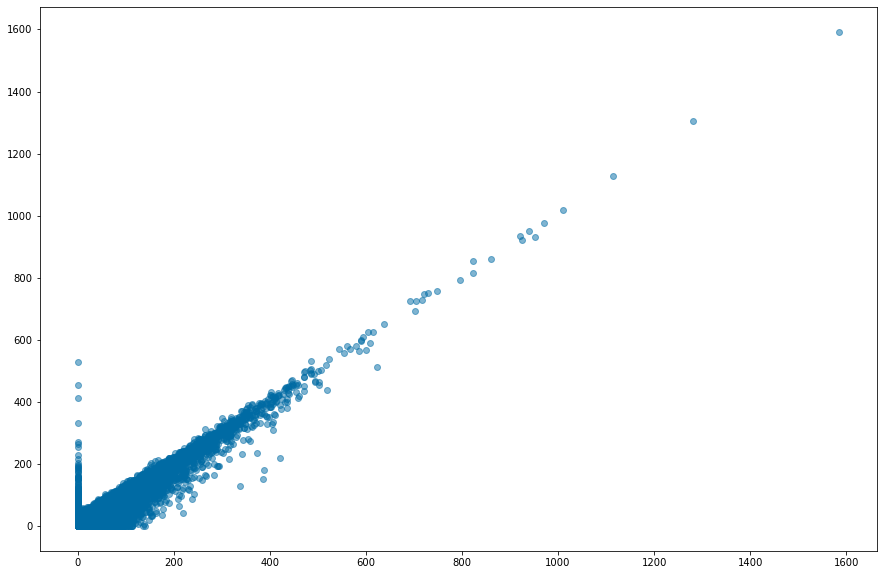

In [16]:
plt.scatter(data['Arrival Delay'], data['Departure Delay'], alpha = 0.5)
pass

You can see that the points lined up more or less along a straight line going from the lower left corner to the upper right. Thus, in some approximation <b>the dependence of the arrival time delay on the departure time delay is linear</b>.

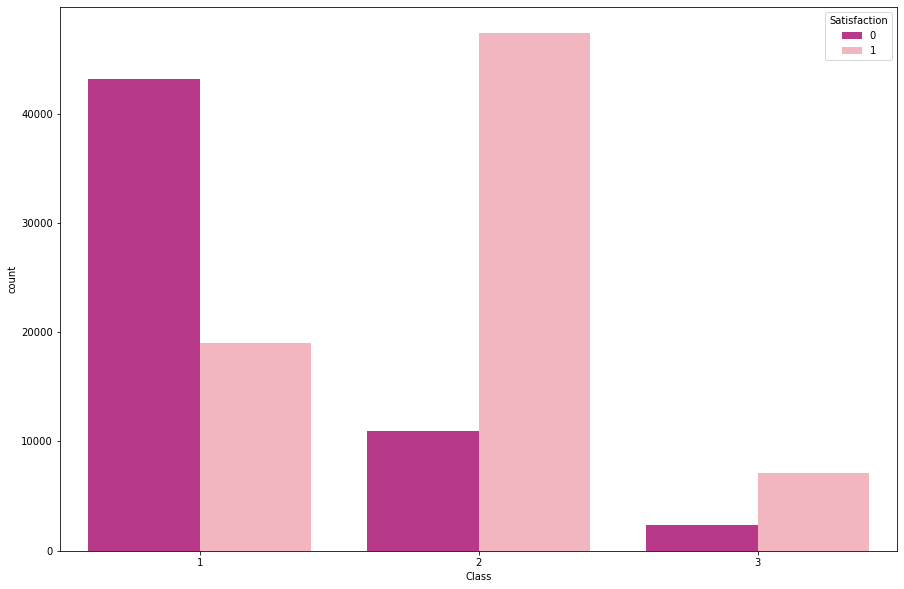

In [17]:
sns.countplot(x = 'Class', hue = 'Satisfaction', palette = "RdPu_r", data = data)
plt.show()

This chart is very revealing. You can see that most of the passengers who flew in economy plus or economy class were dissatisfied with the flight, and those who were lucky enough to fly in business class were satisfied

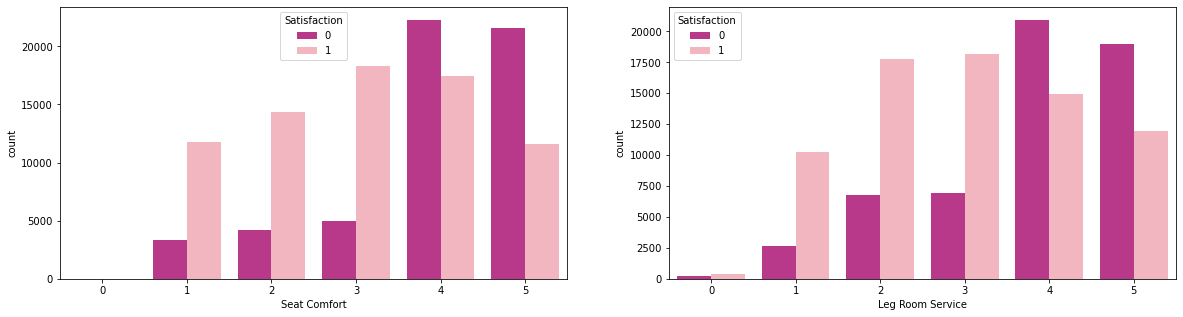

In [18]:
f, ax = plt.subplots(1, 2, figsize = (20,5))
sns.countplot(x = 'Seat Comfort', hue = 'Satisfaction', palette = "RdPu_r", data = data,ax = ax[0])
sns.countplot(x = 'Leg Room Service', hue = 'Satisfaction', palette = "RdPu_r", data = data, ax = ax[1])
plt.show()

From the graphs above, we can conclude the following: most passengers who rated the comfort of the seats and the extra legroom at 4 and 5 points out of 5 were satisfied with the flight.

<AxesSubplot:xlabel='Departure Delay', ylabel='Satisfaction'>

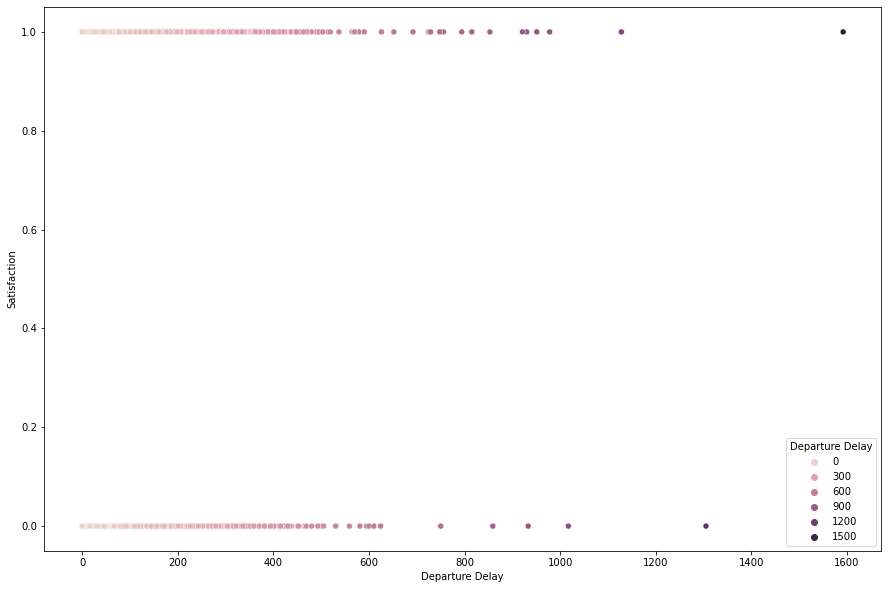

In [19]:
sns.scatterplot(x = 'Departure Delay', y = 'Satisfaction', hue = 'Departure Delay',data = data)

<AxesSubplot:xlabel='Arrival Delay', ylabel='Satisfaction'>

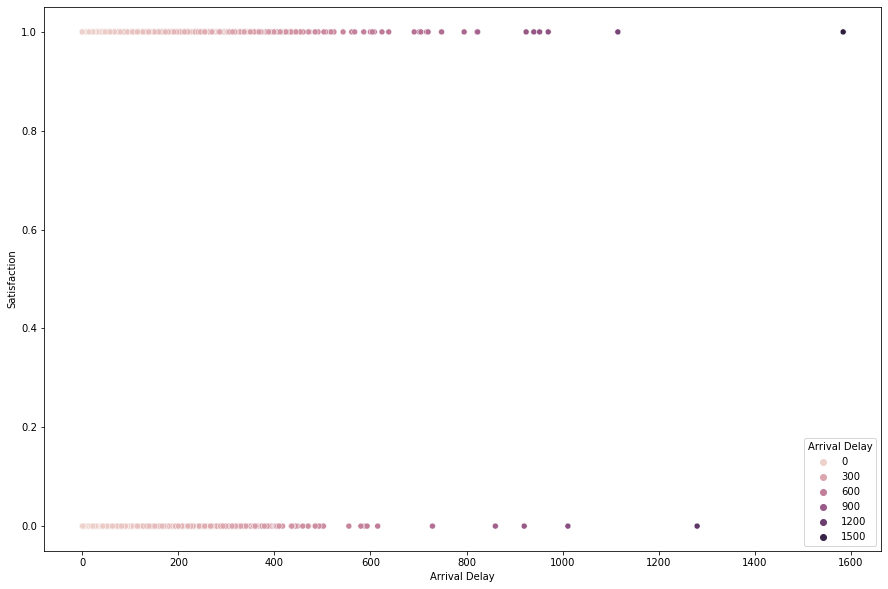

In [20]:
sns.scatterplot(x = 'Arrival Delay', y = 'Satisfaction', hue = 'Arrival Delay',data = data)

<AxesSubplot:xlabel='Leg Room Service', ylabel='Satisfaction'>

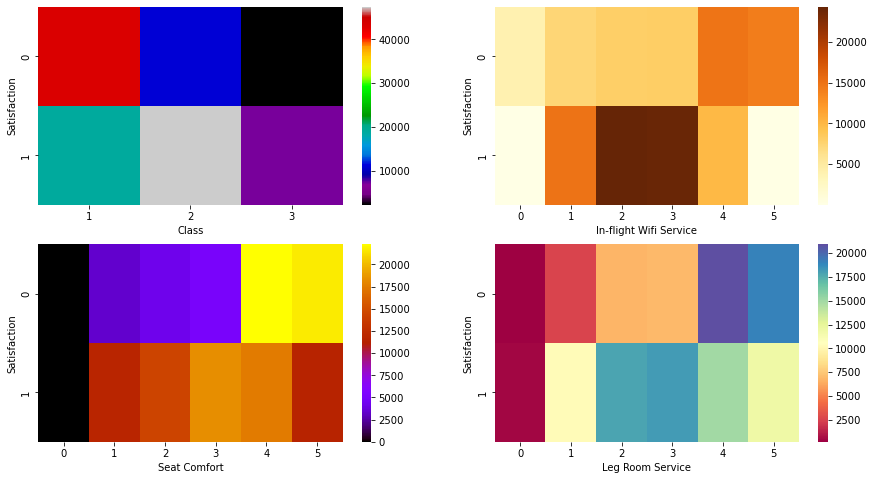

In [21]:
#heat map of features wrt to satisfaction
fig, axarr = plt.subplots(2,2, figsize=(15, 8))
T0 = pd.crosstab(data['Satisfaction'], data['Class'])
sns.heatmap(T0, cmap='nipy_spectral', ax = axarr[0][0])
T1 = pd.crosstab(data['Satisfaction'], data['In-flight Wifi Service'])
sns.heatmap(T1, cmap='YlOrBr', ax = axarr[0][1])
T2 = pd.crosstab(data['Satisfaction'], data['Seat Comfort'])
sns.heatmap(T2, cmap='gnuplot', ax = axarr[1][0])
T3 = pd.crosstab(data['Satisfaction'], data['Leg Room Service'])
sns.heatmap(T3, cmap='Spectral', ax = axarr[1][1])

In [22]:
data.to_csv('model.csv')